### 3.1. Хотим пятерку, а на деле...

Кластеризуйте данный датасет с помощью метода `k-means`. На основе трёх различных __внутренних__ метрик оценки кластеризации, подберите наилучшее количество кластеров $k$.



3 внутренние метрики: метода локтя, индекса силуэта и Davies-Bouldin.


__K-means__

Идея проста - фиксируем количество кластеров $k$. По итогу, каждый $x_i$ должен быть в том кластере, к центру масс которого он ближе всего. Алгоритм:

>- Инициализируем центроиды (центры масс) кластеров $\mu_1, \dots, \mu_k \in \mathbb{R}^n$.
>- Повторять до сходимости:  
>   - Для каждой точки $x^{(i)}$ находим ближайший к ней центр масс $$c^{(i)} = \arg \underset{j}{\min}{\Vert x^{(i)} - \mu_j \Vert^2}$$
>
>   - Для каждого $j$ переопределяем центры масс исходя из ближайших точек на прошлом шаге $$\mu_j = \frac{\sum_{i=1}^{N} 1\{c^{(i)} = j\} \cdot x^{(i)}}{\sum_{i=1}^{N} 1\{c^{(i)} = j\}}$$
    
В алгоритме $k$ - это параметр, обозначающий количество кластеров, __фиксируется изначально__. Центроиды $\mu_j$ представляют собой наши текущие предположения о положении центров кластеров. Инициализация центроидов может происходить различными способами, например, мы можем случайным образом выбрать $k$ точек из обучающего множества

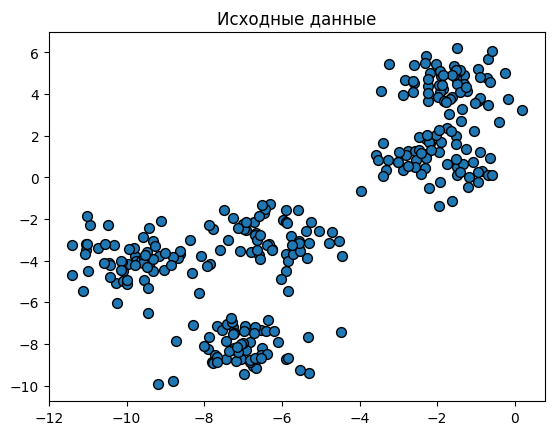

C:\Users\rybal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rybal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rybal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rybal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

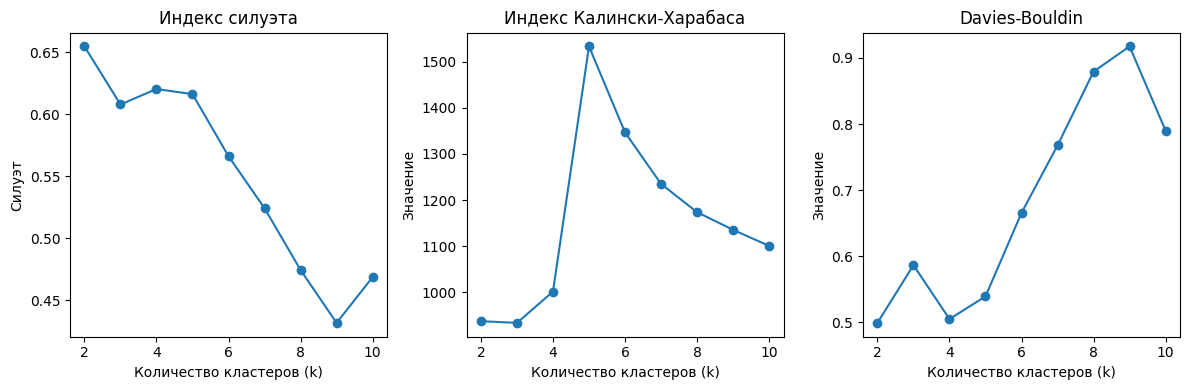

C:\Users\rybal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


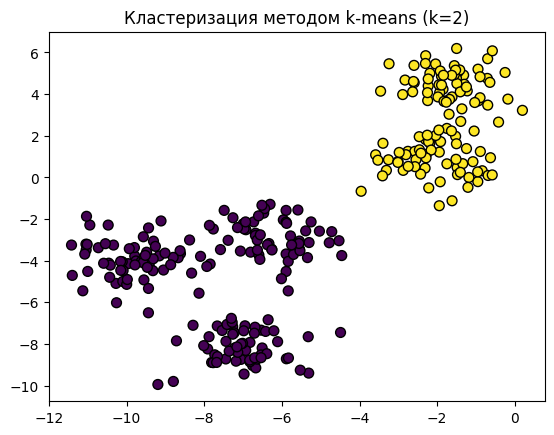

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)

plt.scatter(X[:, 0], X[:, 1], s=50, edgecolor='k')
plt.title("Исходные данные")
plt.show()

def evaluate_kmeans(X, k): #выполняет кластеризацию k-средних, вычисляет 3 метрики
    kmeans = KMeans(n_clusters=k, random_state=1)
    labels = kmeans.fit_predict(X)

    # Индекс силуэта
    silhouette = silhouette_score(X, labels)

    # Индекс Калински-Харабаса
    calinski_harabasz = calinski_harabasz_score(X, labels)

    # Davies-Bouldin
    davies_bouldin = davies_bouldin_score(X, labels)

    return silhouette, calinski_harabasz, davies_bouldin, labels

k_values = range(2, 11) 
metrics = np.zeros((len(k_values), 3))

for i, k in enumerate(k_values): #
    silhouette, calinski_harabasz, davies_bouldin, labels = evaluate_kmeans(X, k)
    metrics[i, :] = silhouette, calinski_harabasz, davies_bouldin

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(k_values, metrics[:, 0], marker='o')
plt.title("Индекс силуэта")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Силуэт")

plt.subplot(1, 3, 2)
plt.plot(k_values, metrics[:, 1], marker='o')
plt.title("Индекс Калински-Харабаса")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Значение")

plt.subplot(1, 3, 3)
plt.plot(k_values, metrics[:, 2], marker='o')
plt.title("Davies-Bouldin")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Значение")

plt.tight_layout()
plt.show()

best_k = k_values[np.argmax(metrics[:, 0])] #у которого максимизирован индекс силуэта
_, _, _, labels = evaluate_kmeans(X, best_k)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')
plt.title(f"Кластеризация методом k-means (k={best_k})")
plt.show()


### 3.2. Повторение - мать ученья

Для предыдущего датасета подберите наилучшие гиперпараметры (мера несходства) с использованием агломеративного метода. Постройте дендрограмму для наилучшей модели.

**дендрограммы** - дерева, где по оси абсцисс откладывается логическое расстояние (согласно заданной метрике) между кластерами, а высота каждого узла пропорциональна величине межгруппового несходства между двумя его дочерними элементами. Другими словами, чем выше связь между двумя кластерами, тем сильнее различаются их признаки. Чем ниже в дереве сливаются группы наблюдений, тем более схожи их наблюдения. С другой стороны, наблюдения, объединившиеся позже, вблизи корня дерева, могут быть совершенно разными.

C:\Users\rybal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\rybal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\rybal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\rybal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\rybal\AppDa

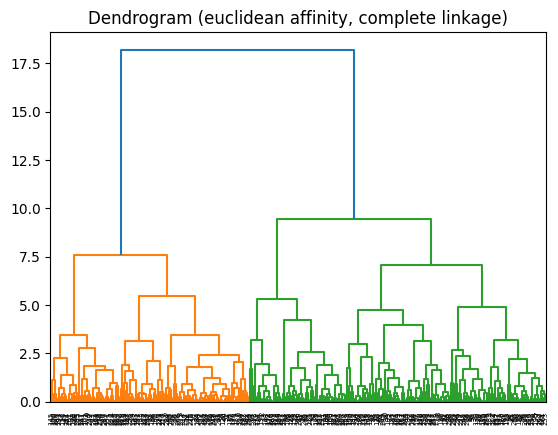

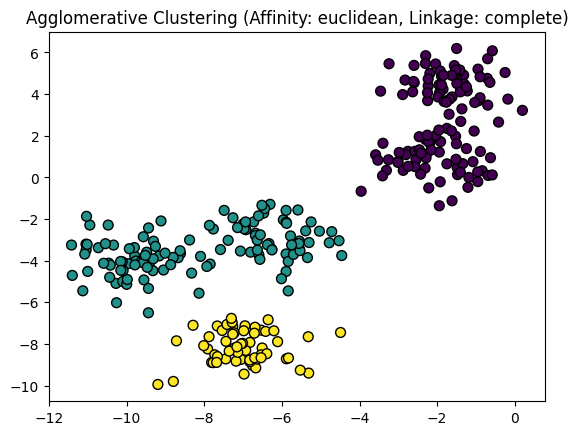

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Генерация данных
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)

# Функция для оценки агломеративной кластеризации с использованием различных мер несходства
def evaluate_agglomerative(X, affinity, linkage_method):
    try:
        agglomerative = AgglomerativeClustering(n_clusters=3, affinity=affinity, linkage=linkage_method)
        labels = agglomerative.fit_predict(X)
        return labels
    except ValueError:
        return None

# Подбор наилучших гиперпараметров
affinities = ['euclidean', 'manhattan', 'cosine']
linkage_methods = ['complete', 'average', 'single']

best_affinity = None
best_linkage = None
best_labels = None
best_score = float('-inf')

for affinity in affinities:
    for linkage_method in linkage_methods:
        labels = evaluate_agglomerative(X, affinity, linkage_method) #агломеративная кластеризация с различными мерами расстояния и связи
        if labels is not None:
            silhouette = silhouette_score(X, labels)
            if silhouette > best_score: #наил. параметры сохр.
                best_score = silhouette
                best_affinity = affinity
                best_linkage = linkage_method
                best_labels = labels

#Строится дендрограмма, представляющая иерархическую структуру кластеров 
dendrogram(linkage(X, method=best_linkage, metric=best_affinity))
plt.title(f"Dendrogram ({best_affinity} affinity, {best_linkage} linkage)")
plt.show()

# Визуализация кластеров для наилучшей модели
plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', s=50, edgecolor='k')
plt.title(f"Agglomerative Clustering (Affinity: {best_affinity}, Linkage: {best_linkage})")
plt.show()


### 3. Матрица расстояний (смежности) и матрица сходств

Расстояния между парами векторов из двух множеств $d\left(X_l, X_j\right)$ могут быть представлены в виде симметричной матрицы расстояний (матрица смежности):

$$
D=\left(\begin{array}{cccc}
0 & d_{12} & \ldots & d_{1 n} \\
d_{21} & 0 & \ldots & d_{2n} \\
\ldots & \ldots & \ldots & \ldots \\
d_{n 1} & d_{n 2} & \ldots & 0
\end{array}\right)
$$

Понятием, противоположным расстоянию, является понятие сходства между объектами. Неотрицательная вещественная функция $S\left(x_i , x_j\right)=S_{i j}$ называется __мерой сходства__, если:


1) $0 \leq S\left(x_i, x_j\right)<1$ для $x_i \neq x_j$

2) $S\left(x_i, x_i\right)=1$

3) $S\left(x_i, x_j\right)=S\left(x_j, x_i\right)$

Пары значений мер сходства можно объединить в __матрицу сходства__:

$$
S=\left(\begin{array}{cccc}
1 & s_{12} & \ldots & s_{1 n} \\
s_{21} & 1 & \ldots & s_{2 n} \\
s_{n 1} &  s_{n 2} & \ldots & 1
\end{array}\right)
$$

Величину $S_{i j}$ называют __коэффициентом сходства__.

Постройте матрицу смежности по датасету первой задачи, взяв в качестве меры расстояния евклидову метрику.

Постройте на основе неё какую-нибудь матрицу сходства (вам надо самим придумать функцию сходства - просто удовлетвроите трём свойствам).

Визуализируйте обе матрицы в виде картинки. Используйте imshow() или pcolormesh() из Matplotlib.

Для получения матриц используйте функцию  [sklearn.metrics.pairwise_distances ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html#sklearn.metrics.pairwise_distances) (тут можно в качестве метрики использовать свою собственную функцию - так можно сделать матрицу сходств) или какую-то другую отсюда https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise

Можно также посмотреть здесь https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors , например, функцию neighbors.[kneighbors_graph](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html#sklearn.neighbors.kneighbors_graph)

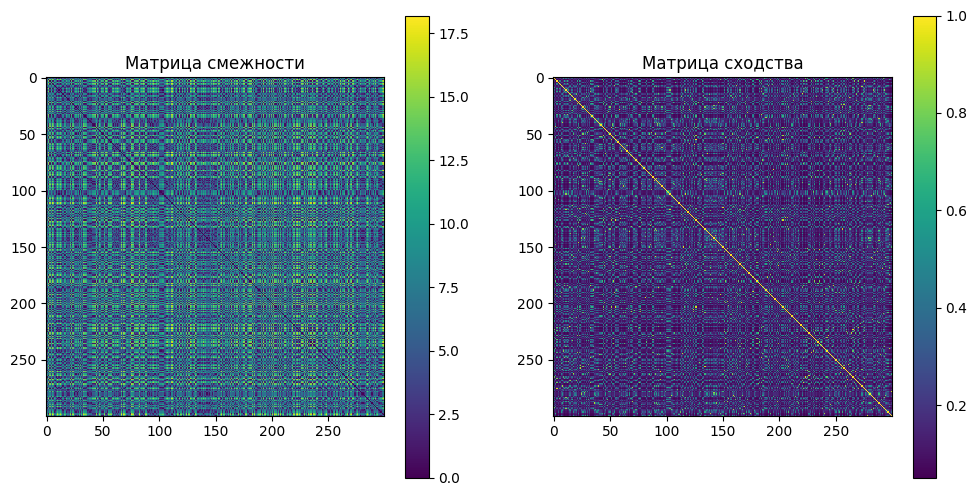

In [7]:
#Матрица смежности:

#Определение: Для графа.
#Элементы: 1 (ребро есть), 0 (ребра нет).
#Матрица сходства:

#Определение: Для набора объектов.
#Элементы: Меры близости между объектами (например, корреляция, косинусное сходство).

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)

distance_matrix = pairwise_distances(X, metric='euclidean') #для вычисления матрицы расстояний между парами точек. 

similarity_matrix = 1 / (1 + distance_matrix) #матрица сходства - обратное значение матрицы расстояний (инверсия)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(distance_matrix, cmap='viridis', interpolation='none') #матрица расстояний
plt.title('Матрица смежности')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(similarity_matrix, cmap='viridis', interpolation='none') #матрица сходства
plt.title('Матрица сходства')
plt.colorbar()

plt.show()
